## Test vad som kan göras med Yfinance
* [pypi.org/project/yfinance](https://pypi.org/project/yfinance/) - [github](https://github.com/ranaroussi/yfinance)

* Denna [Notebook](https://github.com/salgo60/Lysa/blob/main/Notebook/Test%20Yfinance.ipynb)


In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2025-01-21 13:04:20.176704


In [2]:
!pip install pandas yfinance


In [3]:
import pandas as pd
import yfinance as yf

# Lista över stock tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Hämta data för varje ticker
data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data[ticker] = stock.history(period="1y")

# Konvertera data till en DataFrame
df = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})


In [4]:
df.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2024-01-18 00:00:00-05:00,187.710388,142.961746,390.946533,153.500000
2024-01-19 00:00:00-05:00,190.626114,145.851288,395.710907,155.339996
2024-01-22 00:00:00-05:00,192.944748,145.462692,393.566956,154.779999
2024-01-23 00:00:00-05:00,194.228455,146.508896,395.939178,156.020004
2024-01-24 00:00:00-05:00,193.551773,148.162903,399.572021,156.869995


## Beräkna P/E-tal och annan analys

In [5]:
# Hämta ytterligare data som P/E-tal
pe_ratios = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    pe_ratios[ticker] = stock.info['trailingPE']

# Skriv ut P/E-tal för varje aktie
for ticker, pe_ratio in pe_ratios.items():
    print(f"{ticker}: P/E-tal = {pe_ratio}")

# Lägg till sektorsinformation och geografisk fördelning (exempelvärden)
sectors = {
    'AAPL': 'Technology',
    'GOOGL': 'Communication Services',
    'MSFT': 'Technology',
    'AMZN': 'Consumer Discretionary'
}

geographic_distribution = {
    'AAPL': 'USA',
    'GOOGL': 'USA',
    'MSFT': 'USA',
    'AMZN': 'USA'
}

# Skapa en DataFrame för att sammanfatta informationen
summary_df = pd.DataFrame({
    'Ticker': tickers,
    'P/E-tal': pe_ratios.values(),
    'Sektor': sectors.values(),
    'Geografisk Fördelning': geographic_distribution.values()
})

# Visa sammanfattningen
print(summary_df)


AAPL: P/E-tal = 37.88797
GOOGL: P/E-tal = 25.960264
MSFT: P/E-tal = 35.457024
AMZN: P/E-tal = 48.27778
  Ticker    P/E-tal                  Sektor Geografisk Fördelning
0   AAPL  37.887970              Technology                   USA
1  GOOGL  25.960264  Communication Services                   USA
2   MSFT  35.457024              Technology                   USA
3   AMZN  48.277780  Consumer Discretionary                   USA


## Analysera fördelningen i olika sektorer

In [6]:
# Gruppera aktier efter sektor och räkna antalet aktier i varje sektor
sector_distribution = summary_df.groupby('Sektor').size()

# Visa fördelningen av aktier i olika sektorer
print(sector_distribution)


Sektor
Communication Services    1
Consumer Discretionary    1
Technology                2
dtype: int64


In [7]:
summary_df

,Ticker,P/E-tal,Sektor,Geografisk Fördelning
0,AAPL,37.887970,Technology,USA
1,GOOGL,25.960264,Communication Services,USA
2,MSFT,35.457024,Technology,USA
3,AMZN,48.277780,Consumer Discretionary,USA


## Point and figure

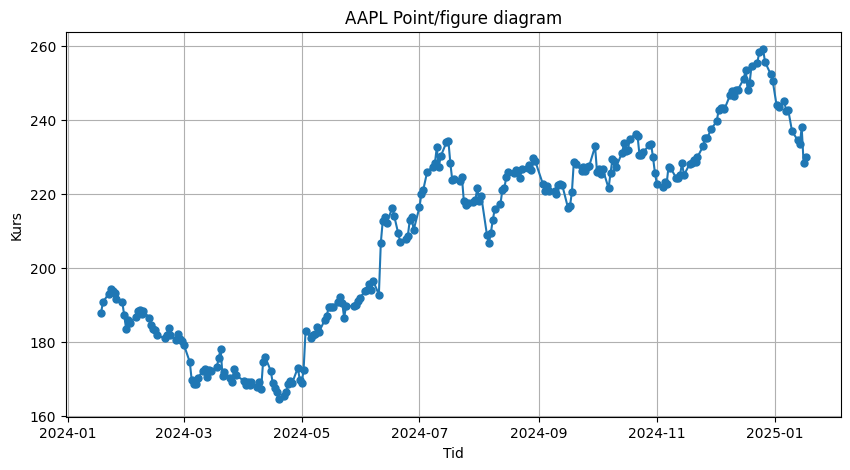

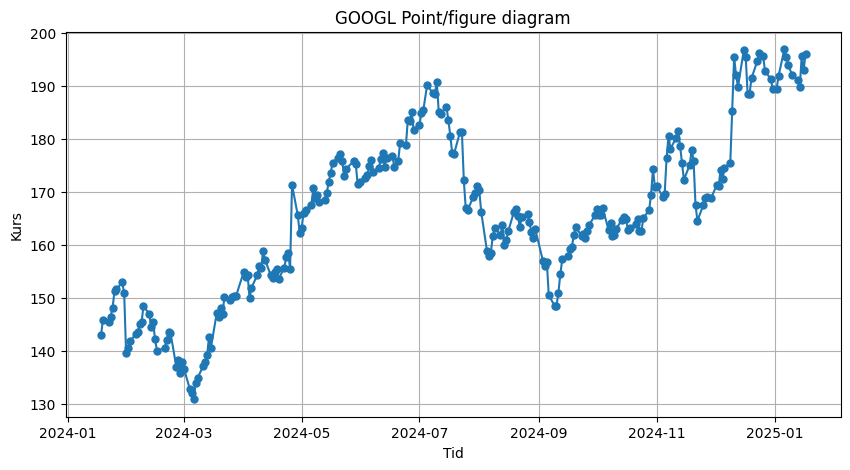

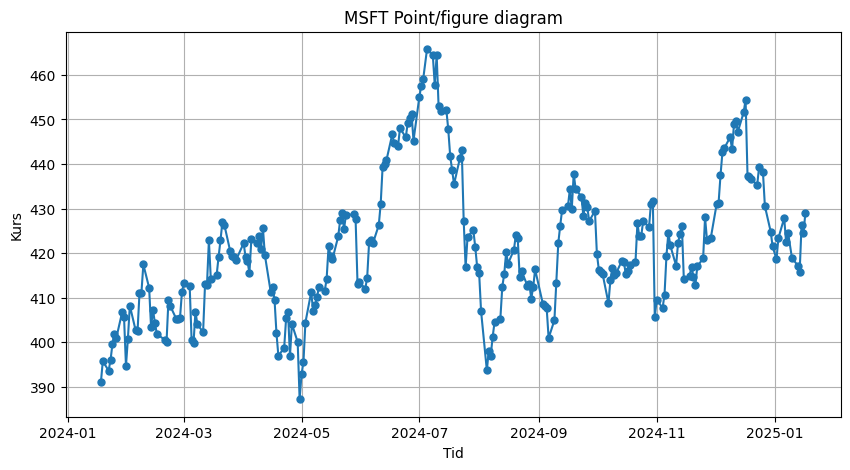

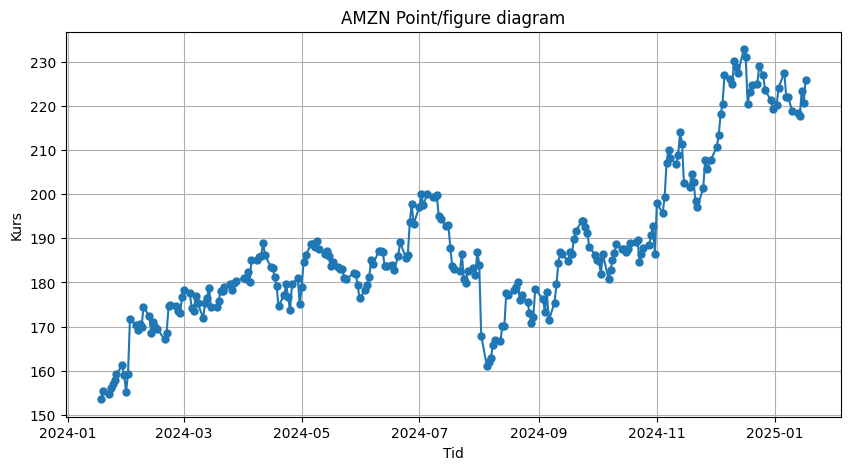

In [8]:
import matplotlib.pyplot as plt

# Skapa ett point/figure diagram för varje ticker
for ticker in tickers:
    plt.figure(figsize=(10, 5))
    plt.plot(df[ticker], marker='o', markersize=5)
    plt.title(f'{ticker} Point/figure diagram')
    plt.xlabel('Tid')
    plt.ylabel('Kurs')
    plt.grid(True)
    plt.show()


### Lägg till fiktiva köp- och säljpunkter och skapa diagram

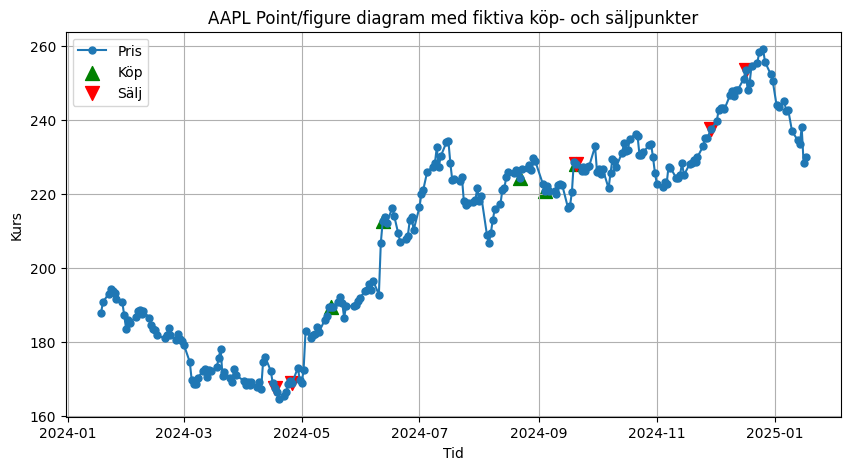

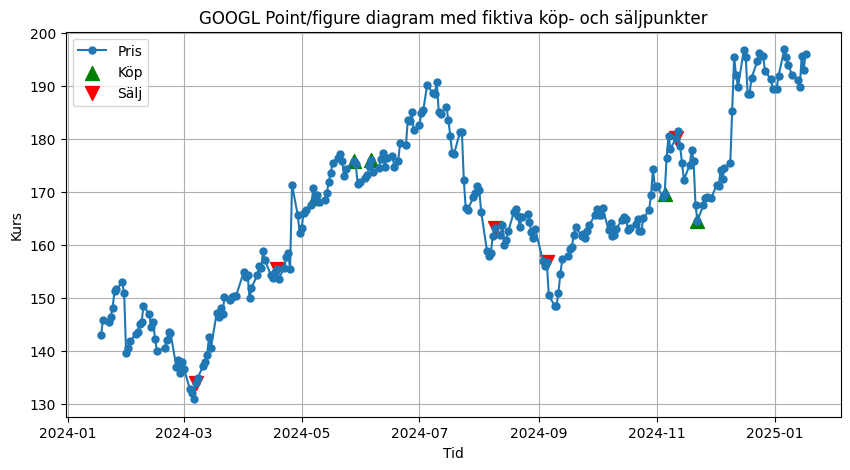

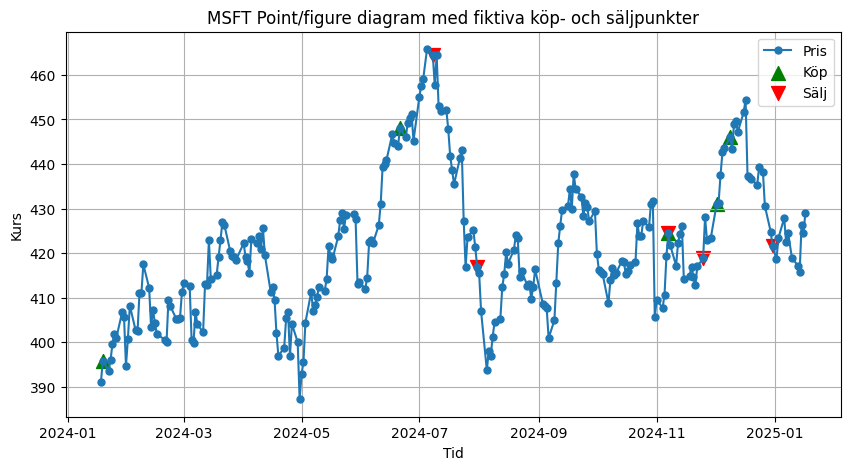

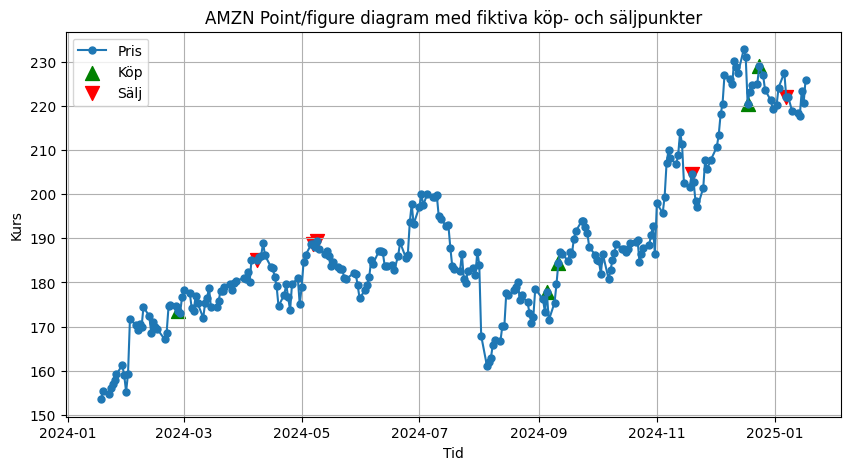

In [9]:
import numpy as np

# Skapa fiktiva köp- och säljpunkter (exempel)
np.random.seed(0)
buy_points = {ticker: np.random.choice(df[ticker].index, size=5, replace=False) for ticker in tickers}
sell_points = {ticker: np.random.choice(df[ticker].index, size=5, replace=False) for ticker in tickers}

# Skapa ett point/figure diagram för varje ticker med köp- och säljpunkter
for ticker in tickers:
    plt.figure(figsize=(10, 5))
    plt.plot(df[ticker], marker='o', markersize=5, label='Pris')
    
    # Markera köp- och säljpunkter
    plt.scatter(buy_points[ticker], df[ticker].loc[buy_points[ticker]], color='green', marker='^', s=100, label='Köp')
    plt.scatter(sell_points[ticker], df[ticker].loc[sell_points[ticker]], color='red', marker='v', s=100, label='Sälj')

    plt.title(f'{ticker} Point/figure diagram med fiktiva köp- och säljpunkter')
    plt.xlabel('Tid')
    plt.ylabel('Kurs')
    plt.legend()
    plt.grid(True)
    plt.show()


### Test dashboard

In [10]:
!pip install dash pandas yfinance plotly

In [11]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go

# Lista över stock tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Hämta data för varje ticker
data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data[ticker] = stock.history(period="1y")

# Konvertera data till en DataFrame
df = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})


In [12]:
# Skapa en Dash-applikation
app = dash.Dash(__name__)

# Layout för Dash-applikationen
app.layout = html.Div([
    html.H1("Aktieövervakningsdashboard"),
    dcc.Dropdown(
        id='ticker-dropdown',
        options=[{'label': ticker, 'value': ticker} for ticker in tickers],
        value=tickers[0]
    ),
    dcc.Graph(id='stock-graph')
])

# Callback för att uppdatera grafen
@app.callback(
    Output('stock-graph', 'figure'),
    Input('ticker-dropdown', 'value')
)
def update_graph(selected_ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df[selected_ticker], mode='lines', name=selected_ticker))
    fig.update_layout(title=f'{selected_ticker} Prisdiagram', xaxis_title='Tid', yaxis_title='Pris')
    return fig

# Starta servern
if __name__ == '__main__':
    app.run_server(debug=True)


### Investeringar

In [13]:
investments = {'AAPL': 10000, 'GOOGL': 1000, 'AMZN': 500,  }

In [14]:

# Skapa en Dash-applikation
app2 = dash.Dash(__name__)

# Layout för Dash-applikationen
app2.layout = html.Div([
    html.H1("Aktieövervakningsdashboard"),
    dcc.Dropdown(
        id='ticker-dropdown',
        options=[{'label': ticker, 'value': ticker} for ticker in tickers],
        value=tickers[0]
    ),
    dcc.Graph(id='stock-graph'),
    html.H2("Mina Investeringar"),
    dcc.Graph(id='investment-graph')
])

# Callback för att uppdatera grafen
@app2.callback(
    Output('stock-graph', 'figure'),
    Input('ticker-dropdown', 'value')
)
def update_graph(selected_ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df[selected_ticker], mode='lines', name=selected_ticker))
    fig.update_layout(title=f'{selected_ticker} Prisdiagram', xaxis_title='Tid', yaxis_title='Pris')
    return fig

# Callback för att uppdatera investeringsgrafen
@app2.callback(
    Output('investment-graph', 'figure'),
    Input('ticker-dropdown', 'value')
)
def update_investment_graph(selected_ticker):
    fig = go.Figure()
    if selected_ticker in investments:
        initial_investment = investments[selected_ticker]
        investment_value = df[selected_ticker] * (initial_investment / df[selected_ticker].iloc[0])
        fig.add_trace(go.Scatter(x=df.index, y=investment_value, mode='lines', name=selected_ticker))
        fig.update_layout(title=f'{selected_ticker} Investeringsvärde', xaxis_title='Tid', yaxis_title='Värde ($)')
    else:
        fig.add_trace(go.Scatter(x=[], y=[]))
        fig.update_layout(title=f'{selected_ticker} Investeringsvärde', xaxis_title='Tid', yaxis_title='Värde ($)')
    return fig

# Starta servern
if __name__ == '__main__':
    app2.run_server(debug=True)


### Expected return vs. risk

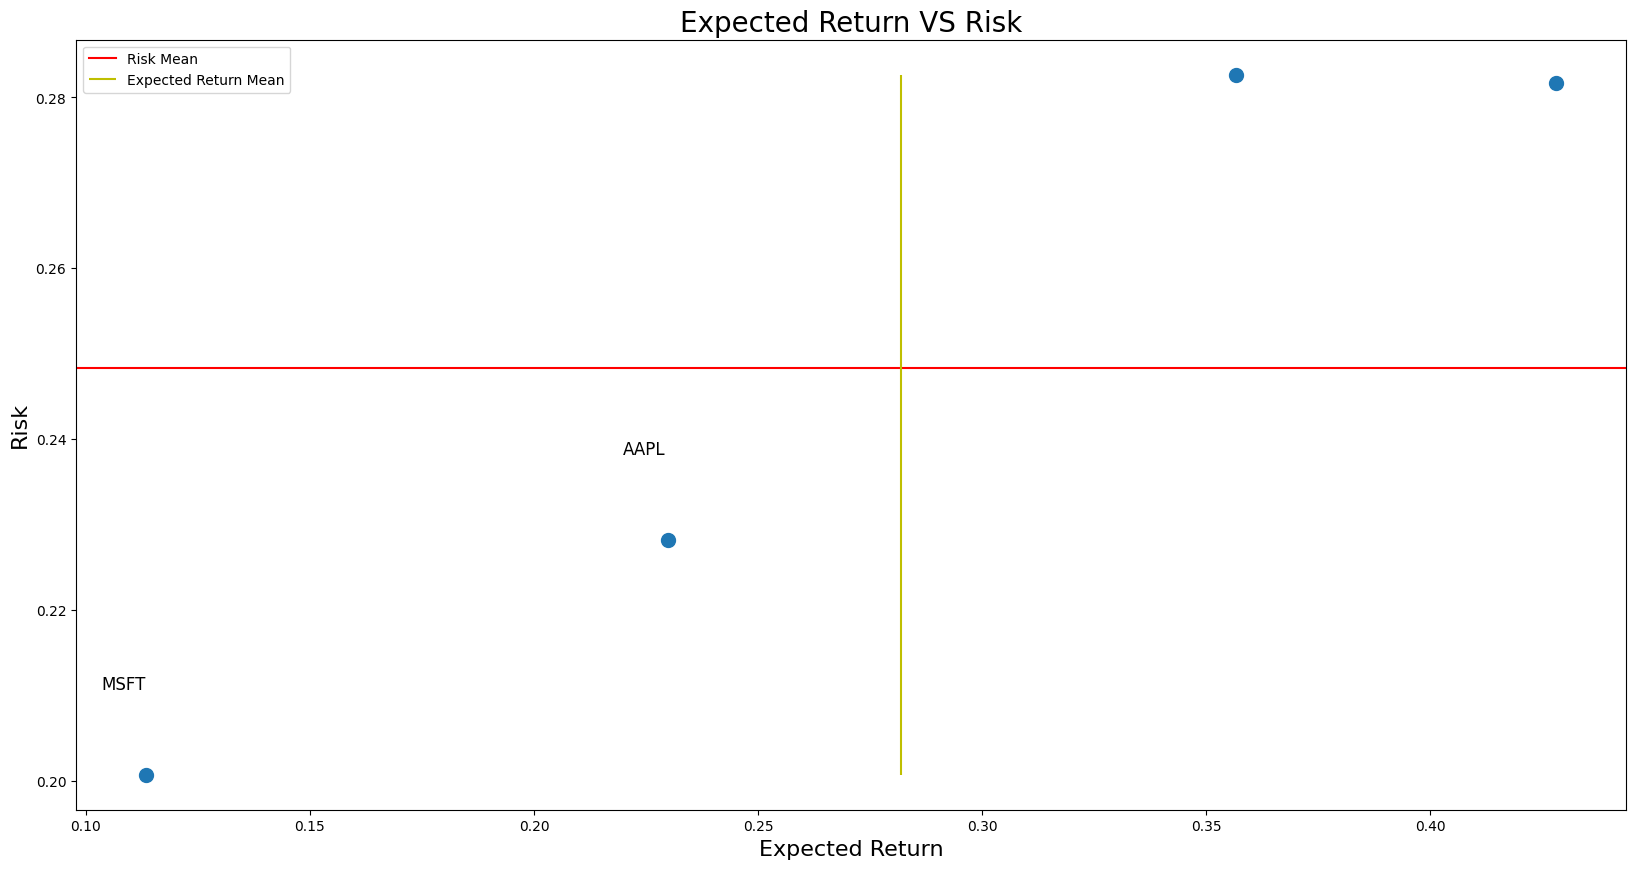

In [15]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Lista över stock tickers och deras investeringar
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
investments = {'AAPL': 10000, 'GOOGL': 1000}

# Hämta data för varje ticker
data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data[ticker] = stock.history(period="1y")

# Konvertera data till en DataFrame
df = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})

# Beräkna förväntad avkastning och risk
returns = df.pct_change().mean() * 252
risk = df.pct_change().std() * (252 ** 0.5)

df_tickers_data = pd.DataFrame({
    'Ticker': tickers,
    'Expected Return': returns.values,
    'Risk': risk.values
})

# Plot expected return vs. risk
plt.figure(figsize=(20,10))
plt.plot(df_tickers_data['Expected Return'], df_tickers_data['Risk'], '.', markersize=20)
plt.title('Expected Return VS Risk', fontsize=20)
for i in range(len(df_tickers_data)):
    txt = df_tickers_data['Ticker'][i]
    x = df_tickers_data['Expected Return'][i]
    y = df_tickers_data['Risk'][i]
    plt.annotate(txt, (x-0.01, y+0.01), fontsize=12)
plt.axhline(y=df_tickers_data['Risk'].mean(), label='Risk Mean', color='r')
plt.vlines(x=df_tickers_data['Expected Return'].mean(), label='Expected Return Mean', color='y', ymin=(min(df_tickers_data['Risk'])), ymax=(max(df_tickers_data['Risk'])))
plt.xlabel('Expected Return', fontsize=16)
plt.ylabel('Risk', fontsize=16)
plt.legend()
plt.show()


### candlestick-grafen

In [16]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go

# Lista över stock tickers och deras investeringar
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
investments = {'AAPL': 10000, 'GOOGL': 1000}

# Hämta data för varje ticker
data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data[ticker] = stock.history(period="1y")

# Konvertera data till en DataFrame
df = {ticker: pd.DataFrame(data[ticker]) for ticker in tickers}


In [17]:
# Skapa en Dash-applikation
app = dash.Dash(__name__)

# Layout för Dash-applikationen
app.layout = html.Div([
    html.H1("Aktieövervakningsdashboard"),
    dcc.Dropdown(
        id='ticker-dropdown',
        options=[{'label': ticker, 'value': ticker} for ticker in tickers],
        value=tickers[0]
    ),
    dcc.Graph(id='stock-graph'),
    html.H2("Mina Investeringar"),
    dcc.Graph(id='investment-graph'),
    html.H2("Expected Return vs. Risk"),
    dcc.Graph(id='risk-return-graph'),
    html.H2("Candlestick Patterns"),
    dcc.Graph(id='candlestick-graph')
])

# Callback för att uppdatera grafen
@app.callback(
    Output('stock-graph', 'figure'),
    Input('ticker-dropdown', 'value')
)
def update_graph(selected_ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[selected_ticker].index, y=df[selected_ticker]['Close'], mode='lines', name=selected_ticker))
    fig.update_layout(title=f'{selected_ticker} Prisdiagram', xaxis_title='Tid', yaxis_title='Pris')
    return fig

# Callback för att uppdatera investeringsgrafen
@app.callback(
    Output('investment-graph', 'figure'),
    Input('ticker-dropdown', 'value')
)
def update_investment_graph(selected_ticker):
    fig = go.Figure()
    if selected_ticker in investments:
        initial_investment = investments[selected_ticker]
        investment_value = df[selected_ticker]['Close'] * (initial_investment / df[selected_ticker]['Close'].iloc[0])
        fig.add_trace(go.Scatter(x=df[selected_ticker].index, y=investment_value, mode='lines', name=selected_ticker))
        fig.update_layout(title=f'{selected_ticker} Investeringsvärde', xaxis_title='Tid', yaxis_title='Värde ($)')
    else:
        fig.add_trace(go.Scatter(x=[], y=[]))
        fig.update_layout(title=f'{selected_ticker} Investeringsvärde', xaxis_title='Tid', yaxis_title='Värde ($)')
    return fig

# Callback för att uppdatera grafen för Expected Return vs. Risk
@app.callback(
    Output('risk-return-graph', 'figure'),
    Input('ticker-dropdown', 'value')
)
def update_risk_return_graph(selected_ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_tickers_data['Expected Return'], y=df_tickers_data['Risk'], mode='markers', marker=dict(size=20), name='Risk/Return'))
    for i in range(len(df_tickers_data)):
        txt = df_tickers_data['Ticker'][i]
        x = df_tickers_data['Expected Return'][i]
        y = df_tickers_data['Risk'][i]
        fig.add_annotation(x=x, y=y, text=txt, showarrow=False, font=dict(size=12))
    fig.add_hline(y=df_tickers_data['Risk'].mean(), line_color='red')
    fig.add_vline(x=df_tickers_data['Expected Return'].mean(), line_color='yellow')
    fig.update_layout(title='Expected Return VS Risk', xaxis_title='Expected Return', yaxis_title='Risk')
    return fig

# Callback för att uppdatera candlestick-grafen
@app.callback(
    Output('candlestick-graph', 'figure'),
    Input('ticker-dropdown', 'value')
)
def update_candlestick_graph(selected_ticker):
    fig = go.Figure(data=[go.Candlestick(
        x=df[selected_ticker].index,
        open=df[selected_ticker]['Open'],
        high=df[selected_ticker]['High'],
        low=df[selected_ticker]['Low'],
        close=df[selected_ticker]['Close'],
        name=selected_ticker
    )])
    fig.update_layout(title=f'{selected_ticker} Candlestick Pattern', xaxis_title='Tid', yaxis_title='Pris')
    return fig

# Starta servern
if __name__ == '__main__':
    app.run_server(debug=True)


In [18]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2025-01-21 13:04:25.261613
Time elapsed (hh:mm:ss.ms) 0:00:05.085335
